# [실습] Fashion MNIST 학습하기 <a class='tocSkip'>
    
## 목표 : 새로운 CNN모델을 만들어 최고 accuracy를 달성해주세요. <a class='tocSkip'>

## 제한시간 : 20분 <a class='tocSkip'>


In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import os
tf.logging.set_verbosity(tf.logging.ERROR)

# Build Graph

## Data 읽어오기

In [17]:
from tensorflow.examples.tutorials.mnist import input_data

def get_data():
    return input_data.read_data_sets("datasets/fashion", one_hot=True)

### Fashion MNIST <a class='tocSkip'>
* MNIST데이터 셋과 동일한 category수를 가지고 있으나 손글씨 숫자가 아닌 fashion item이미지로 구성
* Fashion MNIST데이터의 category label은 다음과 같이 정의 되어 있음

| Label	| Description |
| --- | --- |
|0	|T-shirt/top|
|1	|Trouser |
|2	|Pullover|
|3	|Dress|
|4	|Coat|
|5	|Sandal|
|6	|Shirt|
|7	|Sneaker|
|8	|Bag|
|9	|Ankle boot|

### Data 확인

Extracting datasets/fashion/train-images-idx3-ubyte.gz
Extracting datasets/fashion/train-labels-idx1-ubyte.gz
Extracting datasets/fashion/t10k-images-idx3-ubyte.gz
Extracting datasets/fashion/t10k-labels-idx1-ubyte.gz
1 1 (784,)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


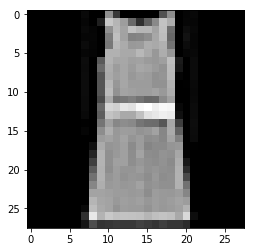

In [18]:
fashion_mnist = get_data()
test_images, test_labels = fashion_mnist.test.next_batch(1)
print len(test_images), len(test_labels), test_images[0].shape
plt.imshow(np.reshape(test_images[0], (28, 28)), cmap='gray')
print test_labels[0]

## Model 정의

### Placeholder : graph 입력부분 정의
* <span class="burk">placeholder 부분을 정의해주세요.</span>

In [30]:
def get_inputs():
    x = tf.placeholder(tf.float32, [None, 28*28])
    y = tf.placeholder(tf.float32, [None, 10])

    return x, y



```python
def get_inputs():
    x = tf.placeholder(tf.float32, [None, 28*28])
    y = tf.placeholder(tf.float32, [None, 10])
    
    return x, y
```

### Model : algorithm 을 graph 연산으로 정의
* <span class="burk">모델을 자유롭게 구성해주세요.</span>

In [23]:
def build_model(images):

  x_image = tf.reshape(images, [-1, 28, 28, 1])

  # filter shape : w, h, in_channel, out_channel
  conv1_filters = tf.Variable(tf.random_normal([3, 3, 1, 16], stddev=0.01))
  conv1 = tf.nn.conv2d(x_image, conv1_filters, strides=[1, 1, 1, 1], padding='SAME')
  conv1 = tf.nn.relu(conv1)
  print 'conv1', conv1

  pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
  print 'pool1', pool1

  batch, h, w, d = [x.value for x in pool1.get_shape()]    
  flatten = tf.reshape(pool1, [-1, h*w*d])
  print 'flatten', flatten

  fc_weights = tf.Variable(tf.random_normal([h*w*d, 10], stddev=0.01))
  fc_bias = tf.Variable(tf.random_normal([10]))

  logits = tf.matmul(flatten, fc_weights) + fc_bias
  print 'logits', logits

  return logits


* MNIST Example과 동일한 모델
```python
def build_model(images):
    
    x_image = tf.reshape(images, [-1, 28, 28, 1])
    
    # filter shape : w, h, in_channel, out_channel
    conv1_filters = tf.Variable(tf.random_normal([3, 3, 1, 16], stddev=0.01))
    conv1 = tf.nn.conv2d(x_image, conv1_filters, strides=[1, 1, 1, 1], padding='SAME')
    conv1 = tf.nn.relu(conv1)
    print 'conv1', conv1
    
    pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    print 'pool1', pool1
    
    batch, h, w, d = [x.value for x in pool1.get_shape()]    
    flatten = tf.reshape(pool1, [-1, h*w*d])
    print 'flatten', flatten
    
    fc_weights = tf.Variable(tf.random_normal([h*w*d, 10], stddev=0.01))
    fc_bias = tf.Variable(tf.random_normal([10]))
    
    logits = tf.matmul(flatten, fc_weights) + fc_bias
    print 'logits', logits
    
    return logits
```

## Loss 정의

In [24]:
def get_loss(logits, labels):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=labels))

## Optimizer 정의

In [25]:
def get_optimizer(lr): 
    return tf.train.GradientDescentOptimizer(learning_rate=lr)

## Train Graph 정의

In [26]:
fashion_mnist = get_data()

images, labels = get_inputs()
logits = build_model(images)

loss = get_loss(logits, labels)
optimizer = get_optimizer(lr=0.1)

train_op = optimizer.minimize(loss)

Extracting datasets/fashion/train-images-idx3-ubyte.gz
Extracting datasets/fashion/train-labels-idx1-ubyte.gz
Extracting datasets/fashion/t10k-images-idx3-ubyte.gz
Extracting datasets/fashion/t10k-labels-idx1-ubyte.gz
conv1 Tensor("Relu:0", shape=(?, 28, 28, 16), dtype=float32)
pool1 Tensor("MaxPool:0", shape=(?, 14, 14, 16), dtype=float32)
flatten Tensor("Reshape_1:0", shape=(?, 3136), dtype=float32)
logits Tensor("add:0", shape=(?, 10), dtype=float32)


## Metric 정의

In [27]:
prediction = tf.nn.softmax(logits)
correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Run Graph

In [31]:
BATCH_SIZE = 100
EPOCHS = 10

NUM_BATCH_PER_EPOCH = int(fashion_mnist.train.images.shape[0]/float(BATCH_SIZE))

## Training
* <span class="burk">training코드를 완성해주세요.</span>

In [32]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(EPOCHS):
    for step in range(NUM_BATCH_PER_EPOCH):
        # batch_data 읽어오기
        batch_images, batch_labels = fashion_mnist.train.next_batch(BATCH_SIZE)
        # train_op실행하기
        sess.run(train_op, feed_dict={images:batch_images, labels:batch_labels})

        if step % 50 == 0:
            _accuracy, _loss = sess.run([accuracy, loss], feed_dict = {images:fashion_mnist.test.images, labels:fashion_mnist.test.labels})
            print '{} Epoch, {} Step : accuracy({:.4f}), loss({:.4f})'.format(epoch, step, _accuracy, _loss)

0 Epoch, 0 Step : accuracy(0.1000), loss(3.1915)
0 Epoch, 50 Step : accuracy(0.5417), loss(1.1643)
0 Epoch, 100 Step : accuracy(0.6990), loss(0.8796)
0 Epoch, 150 Step : accuracy(0.7231), loss(0.7555)
0 Epoch, 200 Step : accuracy(0.7273), loss(0.7760)
0 Epoch, 250 Step : accuracy(0.7610), loss(0.6837)
0 Epoch, 300 Step : accuracy(0.7500), loss(0.6686)
0 Epoch, 350 Step : accuracy(0.7553), loss(0.7217)
0 Epoch, 400 Step : accuracy(0.7846), loss(0.6035)
0 Epoch, 450 Step : accuracy(0.8080), loss(0.5580)
0 Epoch, 500 Step : accuracy(0.8072), loss(0.5517)
1 Epoch, 0 Step : accuracy(0.8017), loss(0.5721)
1 Epoch, 50 Step : accuracy(0.8236), loss(0.5092)
1 Epoch, 100 Step : accuracy(0.8124), loss(0.5316)
1 Epoch, 150 Step : accuracy(0.8265), loss(0.5032)
1 Epoch, 200 Step : accuracy(0.8003), loss(0.5798)
1 Epoch, 250 Step : accuracy(0.8353), loss(0.4800)
1 Epoch, 300 Step : accuracy(0.8285), loss(0.4832)
1 Epoch, 350 Step : accuracy(0.8408), loss(0.4627)
1 Epoch, 400 Step : accuracy(0.8061),

```python
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(EPOCHS):
    for step in range(NUM_BATCH_PER_EPOCH):
        # batch_data 읽어오기
        batch_images, batch_labels = fashion_mnist.train.next_batch(BATCH_SIZE)
        # train_op실행하기
        sess.run(train_op, feed_dict={images:batch_images, labels:batch_labels})
        
        if step % 50 == 0:
            _accuracy, _loss = sess.run([accuracy, loss], feed_dict = {images:fashion_mnist.test.images, labels:fashion_mnist.test.labels})
            print '{} Epoch, {} Step : accuracy({:.4f}), loss({:.4f})'.format(epoch, step, _accuracy, _loss)
```